<a href="https://colab.research.google.com/github/guard1000/NLP/blob/master/(TPU)KoELECTRA_%EB%89%B4%EC%8A%A4%EB%B6%84%EB%A5%98_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#목차
이번 실습은 <b>1) 뉴스 데이터 불러오기 및 전처리 2) KoELECTRA 인풋 만들기 3) KoELECTRA를 활용한 유형분류 모델 만들기 4) 훈련 및 성능 검증 5) 실제 데이터로 실습하기</b>로 구성되어 있습니다.

#KoELECTRA를 활용하여 네이버 뉴스 유형분류기 만들기

## 네이버 뉴스 데이터 불러오기 및 전처리

huggingface 패키지를 Colab에 설치합니다

In [1]:
!pip install transformers

     |████████████████████████████████| 1.5MB 7.0MB/s 
     |████████████████████████████████| 890kB 47.2MB/s 
     |████████████████████████████████| 2.9MB 28.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=3413087aed59870060d05151e0b0bebf8829b5198fdda0cbd7188515a14dee60
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


텐서플로우 2와 필요한 모듈들을 임포트합니다.  
최근에 텐서플로우 기본 버전은 2로 바뀌었습니다.

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from transformers import *
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import os

이번 예제에서 사용할 네이버 뉴스 데이터를 로드 합니다.

(예전에 학습용으로 크롤링 및 전처리 해둠)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dummy = pd.read_csv("/content/drive/My Drive/data/Article_shuffled.csv")

In [6]:
dummy.rename(columns={'이해찬 민주당 단배식서 내년 총선 압승해 민주주의 정착 새해 첫날인 1일 여권은 집권 3년 차를 맞은 문재인 정부의 성공을 기원하며 내부 결속 의지를 다졌다. 특히 여당인 더불어민주당은 2020년 총선 압승 을 발판으로 2022년 정권 재창출 을 이뤄내겠다고 다짐했다. 문희상 국회의장은 이날 서울 한남동 의장 공관에서 신년 기자간담회를 열고 집권 3년 차는 아주 중요한 전기 라고 했다. 그러면서 올해를 황금돼지해라고 부르는데 저는 검은 돼지든 흰 돼지든 무게만 나가면 된다고 생각한다 며 흑돈백돈 黑豚白豚 론 을 펼쳤다. 중국 덩샤오핑의 흑묘백묘론 검은 고양이든 흰 고양이든 쥐만 잘 잡으면 된다 을 차용해 올해 경제 발전이 가장 중요한 과제라는 점을 강조한 것으로 해석됐다. 문 의장은 황금으로 누런 돼지라고 하면 이건 정말 대박 이라며 번영의 돼지해에 문재인 정부도 성공하고 우리도 성공하는 한 해가 되길 바란다 고 했다. 민주당은 이날 여의도 당사에서 신년인사회를 겸한 단배식을 열었다. 이해찬 대표는 재작년에는 정권 교체를 이뤘고 작년에는 지방선거에서 민주당이 압도적 승리를 거뒀다 며 이것을 기반으로 내년 총선에서 아주 크게 압승하는 정치적 성과를 올려야 한다 고 했다. 이 대표는 총선에서 크게 이기는 게 이 나라 민주주의를 정착시키는 데 아주 중요한 과업 이라며 그래야 2022년 대선에서 정권을 재창출해 민주당이 평화와 민주주의를 지키는 마지막 보루가 될 수 있다 고 했다. 이 대표는 남북 관계와 관련해 지난해 70년 분단 체제에서 평화 체제로 전환되는 역사적 한 획을 그었다 며 아마 남북 정상회담이 올해 일찍 열릴 가능성이 크다 고 했다. 경제 문제에 대해선 어렵다곤 하지만 조금씩은 나아지고 있다 고 했다. 그러자 홍영표 원내대표는 맞바람을 향해 돛을 펼친다 는 역풍장범 逆風張帆 이라는 말이 있다 며 앞으로도 많은 시련과 도전이 기다리고 있다. 이 대표를 중심으로 더욱 단결하는 한 해가 되도록 하자 고 했다. 민주당 지도부는 이날 오전 서울 국립현충원에서 김영삼·김대중 전 대통령 묘역을 참배했다. 이어 이승만·박정희 전 대통령 묘역도 찾았으나 일부 시민이 어떻게 박 전 대통령 묘역에 인사할 수 있나. 부끄럽지도 않으냐 고 항의해 분위기가 일순간 얼어붙기도 했다. 오후에는 경남 김해 봉하마을을 방문해 노무현 전 대통령 묘역을 참배했다.' : 'document', '정치': 'label'}, inplace=True)

dic_category = {'경제': 0, '생활문화': 1, 'IT과학': 2, '정치': 3, '사회': 4, '오피니언': 5, '세계':6}
for i in range(11000):
  dummy.iloc[i].label = dic_category[dummy.iloc[i].label]

train = dummy[:10000]
test = dummy[10000:11000]

딥러닝 훈련에 사용 할 train 데이터와 test 데이터를 pandas dataframe 형식으로 불러옵니다.

In [7]:
train[50:70]

,document,label
50,2019년 기해년 己亥年 첫날인 1일 오전 부산 해운대해수욕장을 찾은 시민과 관광객...,4
51,정의당 이정미 대표가 문재인 대통령의 신년사에 대해 방향에는 전적으로 동의하지만 그...,3
52,노조 알박기·노조원 감시 혐의 삼성이 에버랜드 현 삼성물산 리조트 부문 에 어용노조...,4
53,문재인 대통령이 그제 고농도 미세먼지와 관련해 “재난에 준하는 상황으로 인식하고 대...,5
54,서울 연합뉴스 인천국제공항 화물터미널에서 아시아나항공 보잉747 화물기에 화물이 탑...,0
55,마이크 폼페이오 미국 국무장관. © AFP 뉴스1 서울 뉴스1 김정한 기자 미국이 ...,6
56,앵커 새해 벽두부터 산불이 나 축구장의 30배 가까운 크기의 산림이 잿더미로 변했습...,4
57,제주 뉴시스 우장호 기자 2일 오전 제주시 라마다프라자제주호텔 대연회장에서 제주상공...,3
58,글자는 읽을 수 있지만 책을 읽지 않는 사람을 의사 문맹 책과 담 쌓은 사람·ali...,5
59,취임사 하는 채광철 목포해경서장 목포해경 목포 연합뉴스 조근영 기자 목포해양경찰서는...,1


뉴스 기사 최대 길이 : 16334
뉴스 기사 평균 길이 : 930.4483


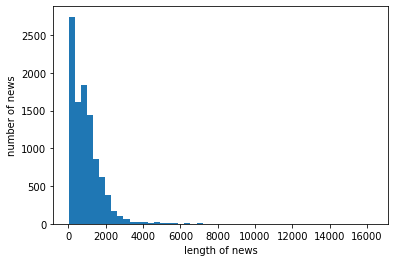

In [8]:
# 전체 데이터 중 가장 긴 뉴스, 뉴스들 평균  길이로 어느정도 길이로 잘라낼지 확인
import matplotlib.pyplot as plt

print('뉴스 기사 최대 길이 :',max(len(l) for l in train.document))
print('뉴스 기사 평균 길이 :',sum(map(len, train.document))/len(train.document))
plt.hist([len(s) for s in train.document], bins=50)
plt.xlabel('length of news')
plt.ylabel('number of news')
plt.show()

In [9]:
#전체 데이터 중 특정 length 이하인 비율을 알려주는 함수
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 데이터 중 길이가 %s 이하인 데이터의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 128  # 위 그래프 보면서 임의로 값 넣어보면서 비율 확인 - 성능 별로면 이거 올려
below_threshold_len(max_len, train.document)

전체 데이터 중 길이가 128 이하인 데이터의 비율: 17.169999999999998


train 데이터와 test 데이터를 전처리하도록 하겠습니다.

특수 문자들을 제거하고, 띄어쓰기가 많은 부분만 간단히 전처리 해주도록 하겠습니다.

In [10]:
train['document'] = train['document'].str.replace(r'[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》\\n\t]+', " ", regex=True)
test['document'] = test['document'].str.replace(r'[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', " ", regex=True)
train['document'] = train['document'].str.replace(r'\t+', " ", regex=True)
test['document'] = test['document'].str.replace(r'\t+', " ", regex=True)
train['document'] = train['document'].str.replace(r'[\\n]+'," ", regex=True)
test['document'] = test['document'].str.replace(r'[\\n]+'," ", regex=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

## KoELECTRA 인풋 만들기

한글 데이터를 분석에 KoELECTRA를 사용해 봅시다.  
monologg님의 KoELECTRA-base-v3 모델을 사용하도록 하겠습니다.  
모델을 로드하기에 앞서, 토크나이저를 불러오도록 하겠습니다.  
huggingface에서는 아주 쉽게 토크나이저를 불러올 수 있습니다.

In [11]:
from transformers import ElectraTokenizer
tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

KoELECTRA를 사용하기에 앞서 가장 기초에 속하는 tokenizer 사용 방법에 대해서 잠시 배워보도록 하겠습니다.  
tokenizer.encode => 문장을 KoELECTRA 모델의 인풋 토큰값으로 바꿔줌  
tokenizer.tokenize => 문장을 토큰화

In [ ]:
print(tokenizer.encode("글자는 읽을 수 있지만 책을 읽지 않는 사람을 의사 문맹 책과 담 쌓은 사람"))

[2, 11024, 4034, 3244, 4292, 2967, 3249, 17164, 3432, 4292, 3244, 4200, 3083, 4034, 6226, 4292, 6804, 2693, 5141, 3432, 4047, 2357, 3027, 4112, 6226, 3]


In [ ]:
print(tokenizer.tokenize("글자는 읽을 수 있지만 책을 읽지 않는 사람을 의사 문맹 책과 담 쌓은 사람"))

['글자', '##는', '읽', '##을', '수', '있', '##지만', '책', '##을', '읽', '##지', '않', '##는', '사람', '##을', '의사', '문', '##맹', '책', '##과', '담', '쌓', '##은', '사람']


우리가 네이버 뉴스분류를 위해, train 1만개의 데이터를 KoELECTRA의 인풋 값으로 바꿔주겠습니다.  
KoELECTRA의 인풋은 토큰, 세그멘트, 마스크로 나눠집니다.  
이 세 값이 KoELECTRA 모형에 들어가서, KoELECTRA 모형에 맞게 고차원으로 임베딩이 되게 되는 원리입니다. (BERT 설명 동) 

토큰은 말 그대로 단어를 단어사전의 위치값으로 표현해주는 것이며, 
세그멘트는 KoELECTRA 모형에서 문장이 앞 문장인지, 뒷 문장인지 표현해주는 것입니다.(본 예제는 인풋으로 문장이 하나만 들어가므로 0으로 통일)  
마스크는 문장이 유효한 값인지, 아니면 유효하지 않은 값이라 패딩 값으로 채운 것인지를 나타냅니다.  
문장이 유효한 값이면 1로 채우고, 유효하지 않은 값이면 0으로 채우게 됩니다.  
문장마다 문장 길이는 다르지만, KoELECTRA의 인풋 길이는 일정해야 하므로, KoELECTRA에서 지정한 문장 길이를 초과하면 패딩값인 0을 채우게 됩니다.

In [ ]:
print(tokenizer.tokenize("체온의 열로 전력을 생산하는 패치형 열전소자를 이용해 소형 전광판을 작동한 모습"))

['체온', '##의', '열', '##로', '전력', '##을', '생산', '##하', '##는', '패치', '##형', '열전', '##소', '##자', '##를', '이용해', '소형', '전광판', '##을', '작동', '##한', '모습']


In [ ]:
print(tokenizer.encode("체온의 열로 전력을 생산하는 패치형 열전소자를 이용해 소형 전광판을 작동한 모습"))

[2, 17356, 4234, 3142, 4239, 7683, 4292, 6552, 4279, 4034, 12001, 4303, 23549, 4104, 4195, 4110, 8164, 9686, 26052, 4292, 9670, 4283, 6373, 3]


In [ ]:
print(tokenizer.encode("체온의 열로 전력을 생산하는 패치형 열전소자를 이용해 소형 전광판을 작동한 모습", max_length=128, pad_to_max_length=True))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[2, 17356, 4234, 3142, 4239, 7683, 4292, 6552, 4279, 4034, 12001, 4303, 23549, 4104, 4195, 4110, 8164, 9686, 26052, 4292, 9670, 4283, 6373, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


토큰 인풋의 예를 들면 다음과 같습니다.  
문장을 토크나이징 하면 "전율을 일으키는 영화. 다시 보고싶은 영화"가  
"'전', '##율', '##을', '일', '##으', '##키는', '영화', '.', '다시', '보고', '##싶', '##은', '영화'" 로 토크나이징이 됩니다.  
이거를 KoELECTRA 인풋에 들어갈 숫자로 바꿔주면,  
["101, 9665, 119183, 10622, 9641, 119185, 66815, 42428, 119, 25805, 98199, 119088, 10892, 42428, 102"]  
로 바뀌게 됩니다. 여기 나오는 숫자들이 KoELECTRA 인풋에 들어가는 토큰 인풋입니다.  
KoELECTRA 모형에 들어가는 인풋은 사실 일정한 길이를 가져야 합니다.(본 예제에서는 128)  
따라서 남는 부분은 0으로 채워지게 됩니다(패딩)

In [ ]:
# 세그멘트 인풋
print([0]*128)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


세그멘트 인풋은 문장이 앞문장인지 뒷문장인지 구분해주는 역할을 하는데요  
본 문장에서는 문장 하나만 인풋으로 들어가기 때문에 0만 들어가게 되고, 문장 길이만큼의 0이 인풋으로 들어가게 됩니다.

In [ ]:
# 마스크 인풋
valid_num = len(tokenizer.encode("체온의 열로 전력을 생산하는 패치형 열전소자를 이용해 소형 전광판을 작동한 모습"))
print(valid_num * [1] + (128 - valid_num) * [0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


마스크 인풋은 토큰 인풋에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 두게 됩니다.

종합하면,  
KoELECTRA의 인풋은 토큰, 세그먼트, 마스크로 이루어져 있습니다.  
"전율을 일으키는 영화. 다시 보고싶은 영화" 라는 문장을 가지고 예를 들면,

토큰 인풋 : [101, 9665, 119183, 10622, 9641, 119185, 66815, 42428, 119, 25805, 98199, 119088, 10892, 42428, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

세그먼트 인풋 : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

마스크 인풋 : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

네이버 뉴스 문장들을 KoELECTRA 인풋으로 바꿔보도록 하겠습니다.  
문장이 토큰 인풋, 세그먼트 인풋, 마스크 인풋으로 변환 됩니다.  
huggingface에서는 순서가 [토큰 인풋, 마스크 인풋, 세그먼트 인풋] 입니다.

In [37]:
def convert_data(data_df):
    global tokenizer
    
    SEQ_LEN = 128 #SEQ_LEN : KoELECTRA에 들어갈 인풋의 길이
    
    tokens, masks, segments, targets = [], [], [], []
    
    for i in tqdm(range(len(data_df))):
        # token : 문장을 토큰화함
        token = tokenizer.encode(data_df[DATA_COLUMN][i], max_length=SEQ_LEN, truncation=True, padding='max_length')
       
        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        
        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
        segment = [0]*SEQ_LEN

        # KoELECTRA 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장
        tokens.append(token)
        masks.append(mask)
        segments.append(segment)
        
        # 정답을 targets 변수에 저장해 줌
        targets.append([data_df[LABEL_COLUMN][i] for j in range(SEQ_LEN)])

    # tokens, masks, segments, 정답 변수 targets를 numpy array로 지정    
    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    targets = np.array(targets)

    return [tokens, masks, segments], targets

# 위에 정의한 convert_data 함수를 불러오는 함수를 정의
def load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_df[LABEL_COLUMN] = data_df[LABEL_COLUMN].astype(int)
    data_x, data_y = convert_data(data_df)
    return data_x, data_y

SEQ_LEN = 128
BATCH_SIZE = 20
# 뉴스 내용을 포함하고 있는 칼럼
DATA_COLUMN = "document"
# 유형을 포함하고 있는 칼럼
LABEL_COLUMN = "label"

# train 데이터를 KoELECTRA 인풋에 맞게 변환
train_x, train_y = load_data(train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 10000/10000 [00:49<00:00, 203.02it/s]


In [38]:
# 훈련 성능을 검증한 test 데이터를 KoELECTRA 인풋에 맞게 변환
test.index = np.arange(0, len(test)) # test index 0부터 시작하게 변환
test_x, test_y = load_data(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 1000/1000 [00:05<00:00, 187.00it/s]


## KoELECTRA 활용한 뉴스 유형분류 모델 만들기

KoELECTRA 훈련을 빠르게 하기 위해, TPU를 사용하도록 하겠습니다.  
TPU를 사용하시고 싶지 않으신 분은 그냥 TPU 관련 부분을 실행하지 않으면 되겠습니다.

In [14]:
# TPU 객체 지정
TPU = True
if TPU:
  resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
  tf.config.experimental_connect_to_cluster(resolver)
  tf.tpu.experimental.initialize_tpu_system(resolver)
else:
  pass

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Initializing the TPU system: grpc://10.59.105.218:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.59.105.218:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


In [15]:
from transformers import TFElectraModel
model = TFElectraModel.from_pretrained("monologg/koelectra-base-v3-discriminator", from_pt=True)

# 토큰 인풋, 마스크 인풋, 세그먼트 인풋 정의
token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_segment')
# 인풋이 [토큰, 마스크, 세그먼트]인 모델 정의
koelectra_outputs = model([token_inputs, mask_inputs, segment_inputs])
# KoELECTRA 아웃풋의 텐서의 shape은 [batch_size, 문장의 길이, 768]임

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFElectraModel: ['discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'electra.embeddings.position_ids', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing TFElectraModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFElectraModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraModel for predictions without further train

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7fb519f1ce58> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).WARNING:tensorflow:AutoGraph could not transform <bound method Socket.send of <zmq.sugar.socket.Socket object at 0x7fb507dd3660>> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7fb519f1ce58> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7fb519f1ce58> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [16]:
koelectra_outputs = koelectra_outputs[0] # 1-> 0
classify_first = tf.keras.layers.Dense(7, activation='softmax', kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.02))(koelectra_outputs)

classify_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], classify_first)
classify_model.compile(optimizer=tf.keras.optimizers.Adam(lr=1.0e-5), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['sparse_categorical_accuracy'])

In [17]:
classify_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_segment (InputLayer)      [(None, 128)]        0                                            
__________________________________________________________________________________________________
tf_electra_model (TFElectraMode TFBaseModelOutput(la 112330752   input_word_ids[0][0]             
                                                                 input_masks[0][0]            

유형분류에 맞는 KoELECTRA 모형을 리턴하는 함수를 정의하도록 하겠습니다.  
TPU를 활용하려면 함수로 묶어야 합니다.

In [42]:
def create_classify_koelectra():
  # KoELECTRA pretrained 모델 로드
  model = TFElectraModel.from_pretrained("monologg/koelectra-base-v3-discriminator", from_pt=True)
  # 토큰 인풋, 마스크 인풋, 세그먼트 인풋 정의
  token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
  mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
  segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_segment')
  # 인풋이 [토큰, 마스크, 세그먼트]인 모델 정의
  koelectra_outputs = model([token_inputs, mask_inputs, segment_inputs])

  koelectra_outputs = koelectra_outputs[0]
  classify_first = tf.keras.layers.Dense(7, activation='softmax', kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.02))(koelectra_outputs)

  classifiy_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], classify_first)
  classifiy_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00002), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['sparse_categorical_accuracy'])
  return classifiy_model

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFElectraModel: ['discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'electra.embeddings.position_ids', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing TFElectraModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFElectraModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraModel for predictions without further train

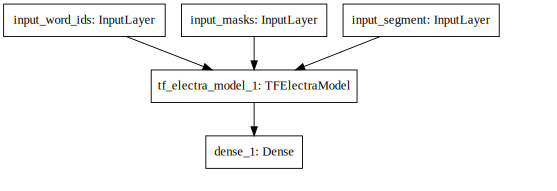

In [20]:
# 모델의 Flow 확인
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(create_classify_koelectra(), dpi=65).create(prog='dot', format='svg'))

## 훈련 및 성능 검증

In [43]:
# TPU 실행 시
if TPU:
  strategy = tf.distribute.experimental.TPUStrategy(resolver)
# 함수를 strategy.scope로 묶어 줌
  with strategy.scope():
    classify_model = create_classify_koelectra()
  
  classify_model.fit(train_x, train_y, epochs=4, shuffle=True, batch_size=32, validation_data=(test_x, test_y))
else:
  # GPU 모드로 훈련시킬 때
  classify_model = create_classify_koelectra()
  
  classify_model.fit(train_x, train_y, epochs=4, shuffle=True, batch_size=32, validation_data=(test_x, test_y))

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFElectraModel: ['discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'electra.embeddings.position_ids', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing TFElectraModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFElectraModel were initialized from the PyTorch model.
If your task is similar to the tas

Epoch 1/4


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.
The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


313/313 [==============================] - ETA: 0s - loss: 1.4769 - sparse_categorical_accuracy: 0.4480

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


313/313 [==============================] - 152s 246ms/step - loss: 1.4758 - sparse_categorical_accuracy: 0.4485 - val_loss: 0.8149 - val_sparse_categorical_accuracy: 0.7187
Epoch 2/4
313/313 [==============================] - 25s 78ms/step - loss: 0.6510 - sparse_categorical_accuracy: 0.7932 - val_loss: 0.6862 - val_sparse_categorical_accuracy: 0.7744
Epoch 3/4
313/313 [==============================] - 25s 79ms/step - loss: 0.4696 - sparse_categorical_accuracy: 0.8567 - val_loss: 0.6777 - val_sparse_categorical_accuracy: 0.7772
Epoch 4/4
313/313 [==============================] - 25s 79ms/step - loss: 0.3669 - sparse_categorical_accuracy: 0.8860 - val_loss: 0.6415 - val_sparse_categorical_accuracy: 0.8025


훈련한 모델을 path에 저장
path는 임의로 지정해 주세요

In [ ]:
# PATH는 임의로 지정
path = "/content"

In [ ]:
classify_model.save_weights(path+"/huggingface_koelectra_classify.h5")

훈련 모델의 예측 성능을 F1 SCORE로 체크하기 위한 작업

In [44]:
def predict_convert_data(data_df):
    global tokenizer
    tokens, masks, segments = [], [], []
    
    for i in tqdm(range(len(data_df))):

        token = tokenizer.encode(data_df[DATA_COLUMN][i], max_length=SEQ_LEN, truncation=True, padding='max_length')
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        segment = [0]*SEQ_LEN

        tokens.append(token)
        segments.append(segment)
        masks.append(mask)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]

# 위에 정의한 convert_data 함수를 불러오는 함수를 정의
def predict_load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_x = predict_convert_data(data_df)
    return data_x

test 데이터 예측하기

In [45]:
test_set = predict_load_data(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 1000/1000 [00:04<00:00, 222.70it/s]


In [ ]:
test_set

[array([[    2, 11642,    22, ...,  4139, 27436,     3],
        [    2,  6265,  9173, ...,     0,     0,     0],
        [    2,  9416,  4584, ...,  3240, 17328,     3],
        ...,
        [    2,    22,  4482, ...,  4199,  4139,     3],
        [    2,  6257,  7913, ...,  6257,  4234,     3],
        [    2,  6265,  9173, ...,     0,     0,     0]]),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [73]:
with strategy.scope():
  preds = classify_model.predict(test_set)
  answers = [np.argmax(preds[_][0]).astype(int) for _ in range(len(preds))]

In [74]:
answers[:10]

[1, 4, 3, 3, 3, 1, 1, 1, 4, 4]

우리가 훈련한 모델을 F1 SCORE를 바탕으로 성능 측정  
F1 SCORE는 precision과 recall을 가중평균하여 계산합니다  
recall은 (모델이 TRUE라고 판정한 것의 숫자)/(전체 TRUE의 숫자)  
precision은 (진짜 TRUE) / (모델이 TRUE라고 판정한 것의 숫자)

In [75]:
from sklearn.metrics import classification_report
y_true = test['label']
# F1 Score 확인
print(classification_report(y_true, answers))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       148
           1       0.67      0.80      0.73       139
           2       0.82      0.89      0.86       168
           3       0.80      0.84      0.82       167
           4       0.87      0.80      0.83       161
           5       0.92      0.79      0.85       160
           6       0.91      0.75      0.83        57

    accuracy                           0.81      1000
   macro avg       0.82      0.80      0.81      1000
weighted avg       0.82      0.81      0.81      1000



In [ ]:
import logging
tf.get_logger().setLevel(logging.ERROR)

# 실제 데이터로 실습하기

문장 하나 하나를 가지고 실제로 분류해보도록 하겠습니다.  

In [87]:
def sentence_convert_data(data):
    global tokenizer
    tokens, masks, segments = [], [], []
    token = tokenizer.encode(data, max_length=SEQ_LEN, truncation=True, padding='max_length')
    
    num_zeros = token.count(0) 
    mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros 
    segment = [0]*SEQ_LEN

    tokens.append(token)
    segments.append(segment)
    masks.append(mask)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]

def news_class_predict(sentence):
    data_x = sentence_convert_data(sentence)
    predict = classify_model.predict(data_x)

    # inverse dictionary
    inv_dic_category = {v: k for k, v in dic_category.items()}
    print("[%s] 유형입니다." % inv_dic_category[np.argmax(predict[0][0])])

In [88]:
# 201222 정치 뉴스 - 문 대통령 "권력기관 개혁 갈등, 민주주의 성숙의 계기"
news_class_predict("문재인 대통령이 22일 오전 국회의장과 대법원장, 헌법재판소장, 국무총리, 중앙선거관리위원장 등 5부 요인을 초청해 코로나19 백신과 권력기관 개혁, 경제와 고용, 북미대화와 남북대화 등을 주제로 대화를 나눴다.")

[정치] 유형입니다.


In [89]:
# 201222 IT 뉴스 - 삼성전자·SKT·카카오 동맹…감염 위험 알리는 AI 만든다
news_class_predict("한국을 대표하는 정보기술(IT) 기업들이 신종 코로나바이러스 감염증(코로나19) 등 ‘팬데믹(대유행)’ 극복을 위한 인공지능(AI) 기술 개발을 위해 손잡았다. 삼성전자, SK텔레콤, 카카오는 코로나19 조기 극복과 공공 이익을 위한 AI 개발에 협력하기로 했다고 22일 발표했다. 이번 ‘AI 동맹’으로 각 사가 가진 핵심 역량을 모아 미래 AI 기술 개발과 사회적 난제 해결을 위한 AI 활용 방안 연구, AI 기술 저변 확대를 공동 추진한다.")

[IT과학] 유형입니다.


In [90]:
# 201222 경제 뉴스 - 이건희 주식 상속세 11조400억원 확정…두 달새 8000억원 늘어
news_class_predict("고(故) 이건희 삼성전자 회장이 보유한 주식에 대해 이재용 삼성전자 부회장 등 상속인이 내야할 상속세 규모가 약 11조400억 원으로 확정됐다. 역대 최대 규모다. 이 부회장을 비롯해 유가족들의 상속세 재원 마련 방안에 대한 재계 관심이 높아지고 있다. 이 회장이 보유하고 있는 주식은 삼성전자(4.18%·2억4927만3200주), 삼성전자 우선주(0.08%·61만9900주), 삼성생명(20.76%·4151만9180주), 삼성물산(2.88%·542만 5733주), 삼성SDS(0.01%·9701주) 등이다.")

[경제] 유형입니다.
